# AS HW4

김보람  
2023-06-09

In [1]:
library(car)
library(MASS)
library(glmnet)

Loading required package: carData

Loading required package: Matrix

Loaded glmnet 4.1-7


# 1번

”ex4.1.csv” 데이터는 다음의 변수로 이루어져 있다.

• Age : Age in years

• Weight : Weight in lbs

• HtShoes : Height in shoes in cm

• Ht : Height bare foot in cm

• Seated : Seated height in cm

• Arm : lower arm length in cm

• Thigh : Thigh length in cm

• Leg : Lower leg length in cm

• hipcenter : horizontal distance of the midpoint of the hips from a
fixed location in the car in mm

“hipcenter”를 예측하기 위한 모형을 적합하려고 한다. 다음 물음에
답하여라.

In [2]:
ex4 <- read.csv("ex4.1.csv")

In [3]:
ex4

## (1)

변수들 사이의 산점도행렬을 그리고 설명하여라.

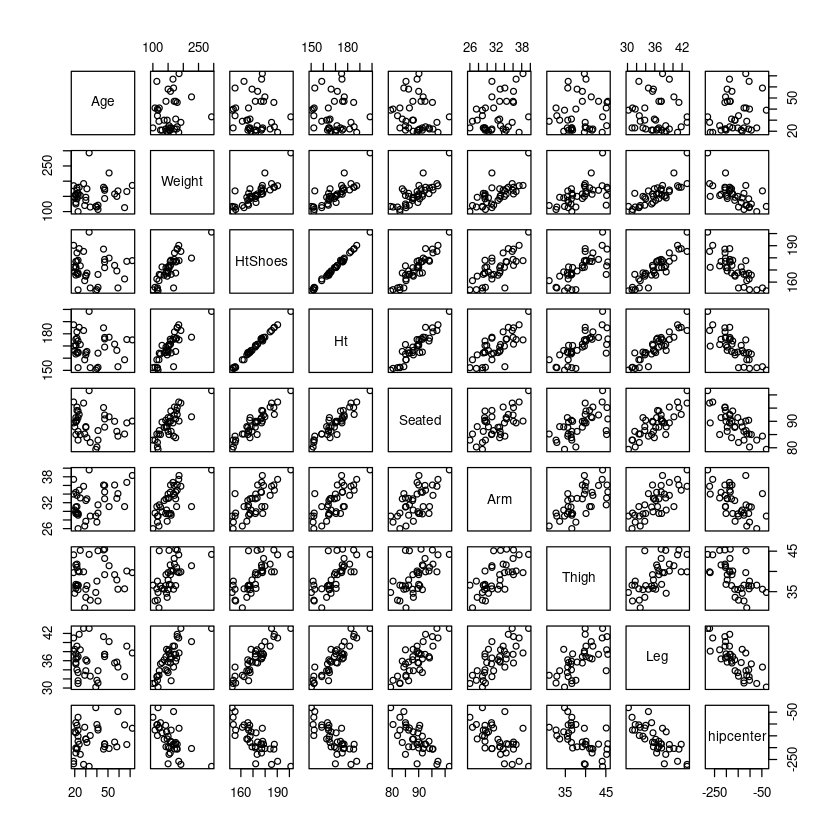

In [4]:
pairs(ex4)

-   hipcenter와 대부분 음의 상관관계가 있어보이고, Age는 관계가
    없어보인다.

-   다른 설명변수들간에도 서로 양의 상관관계가 있어보인다. Age는 다른
    변수들과도 관계가 없어 보임.

## (2)

변수들 사이의 상관계수를 구하여라. (소수점 둘째자리까지 반올림)
다중공선성이 존재한다고 할 수 있는가?

In [5]:
round(cor(ex4),2)

-   각 변수들간의 상관관계가 대체적으로 높은 편이며 양의 상관관계를
    가지는 경우가 많다.

## (3)

선형회귀모형을 적합하여라. (계수를 추정. 예 : $\hat y = 3 + 2x$ 이렇게
적어주기)

In [6]:
fit <- lm(hipcenter~., ex4)
summary(fit)

$\widehat {hipcenter}=436.43+0.78 \widehat{Age} + 0.03 \widehat{Weight} - 2.69 \widehat{HtShoes}+0.60\widehat{Ht}+0.53\widehat{Seated}-1.33\widehat{Arm}-1.14\widehat{Thigh}-6.44\widehat{Leg}$

## (4)

위의 선형회귀모형에서 개별 회귀계수의 유의성 검정 결과와 (1),(2)번
결과와 연관지어 설명하여라.

회귀모형의 p-value값은 1.306e-05으로 유의하고 $R^2$값도 68%정도로 약간
높은 편이지만 회귀계수는 절편을 제외하고는(절편도..그닥.) 모두 유의하지
않다. 이와 같은 경우는 다중공산성이 존재하기 때문이다.

## (5)

car 패키지의 vif 함수를 이용하여 각 설명변수의 vif값을 구하여라.

In [7]:
vif(fit)

-   vif의 값이 10이상이면 다중공산성이 있다고 보자.

-   HtShoes,Ht의 값이 높은 값을 가지며 다중곤상성이 있다.

## (6)

glmnet 함수를 이용하여 능형회귀모형을 적합하고자 한다.

### (a)

In [9]:
X <- model.matrix(hipcenter~., ex4)[,-1] 
y <- ex4$hipcenter

λ 의 값에 따라 회귀계수가 변하는지 그림으로 보여라. (이 때 0 \< λ \< 100
으로 설정)

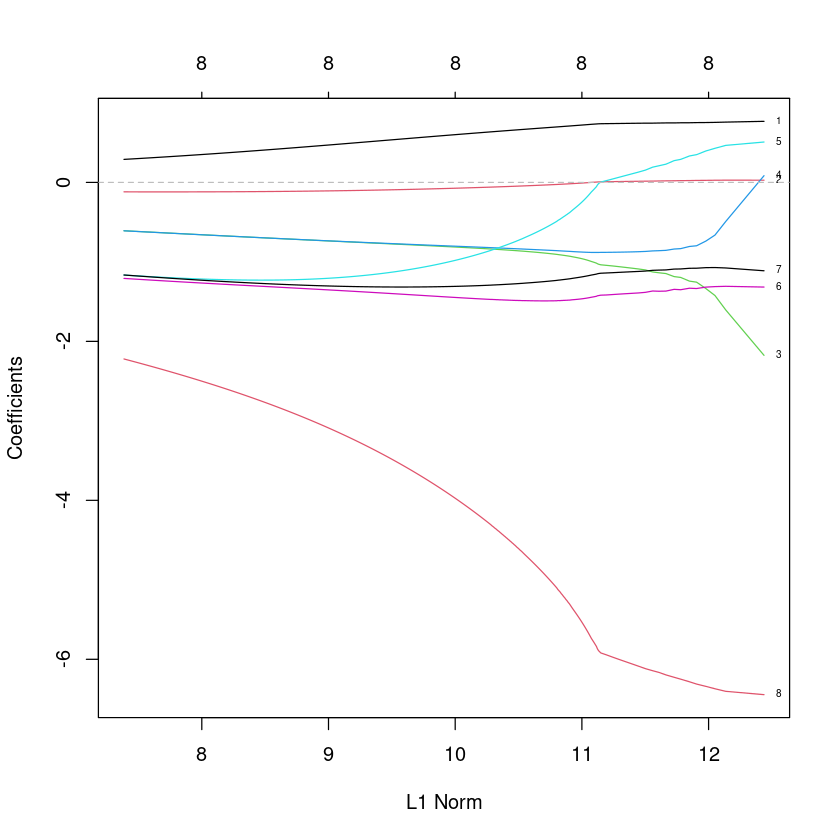

In [10]:
ridge.fit<-glmnet(X,y,alpha=0, lambda=seq(0,100,0.1)) ##ridge : alpha=0 
plot(ridge.fit, label=TRUE)
abline(h=0, col="grey", lty=2)

### (b)

교차검증을 수행하였을 때, MSE를 가장 작게 하는 λ 는 무엇인가?

In [66]:
X <- model.matrix(hipcenter~., ex4)[,-1] 
y <- ex4$hipcenter

In [11]:
cv.fit<-cv.glmnet(X,y,alpha=0,nfolds=length(y))

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”

In [12]:
cv.fit

-   $\lambda$=36.41일 때 MSE가 가장 작다.

### (c) 이게 맞나…

위의 λ에 대한 능형회귀 추정량은 무엇인가?

In [13]:
lam<-cv.fit$lambda.min;lam

In [14]:
log(lam)

In [15]:
predict(ridge.fit,type="coefficients",s=lam)

In [16]:
beta <- predict(ridge.fit,type="coefficients",s=lam)

In [17]:
beta

# 2번

Hastie와 Tibshirani (1990, p.282)는 척추가 심하게 앞으로 굽어서 척추
교정 수술을 해야하는 척추후만증(kyphosis)에 대한 위험인자를 결정하는
연구를 하였다. 18명의 척추후만증 환자들을 대상으로 수술했을 때의
나이(월)는 각각 12, 15, 42, 52, 59, 73, 82, 91, 96, 105, 114, 120, 121,
128, 130, 139, 139, 157였고, 척추후만증이 없는 22명의 환자의 나이는 1,
1, 2, 8, 11, 18, 22, 31, 37, 61, 72, 81, 97, 112, 118, 127, 131,140,
151, 159, 177, 206으로 조사되었다. 다음 물음에 답하여라.

In [18]:
kyphosisY <-c(12, 15, 42, 52, 59, 73, 82, 91, 96, 105, 114, 120, 121, 128, 130, 139, 139, 157)
kyphosisN <-c(1, 1, 2, 8, 11, 18, 22, 31, 37, 61, 72, 81, 97, 112, 118, 127, 131,140, 151, 159, 177, 206)

In [19]:
y <- c(rep(1, length(kyphosisY)), rep(0, length(kyphosisN)))

In [20]:
dt <- data.frame(age = c(kyphosisY, kyphosisN), kyphosis = y)

In [21]:
dt

## (1)

나이를 예측변수로 하여 척추후만증에 대한 로지스틱 회귀모형을 적합하라.
(모형을 정확하게 기재)

In [22]:
model <- glm(kyphosis ~ age, data = dt, family = binomial())

In [23]:
summary(model)

$\widehat {kyphosis} = -0.5727 +0.0043 \widehat{age}$

## (2)

나이가 유의한 효과를 갖는지를 검정하라.

age의 z-value의 값은 0.734로 0.05보다 크므로 유의하지 않다.

## (3)

자료에 대한 산점도를 그려라. 단, 척추후만증의 두 수준에서 나이의 분포가
차이가 나는 것을 주목하라.(상자그림 확인)

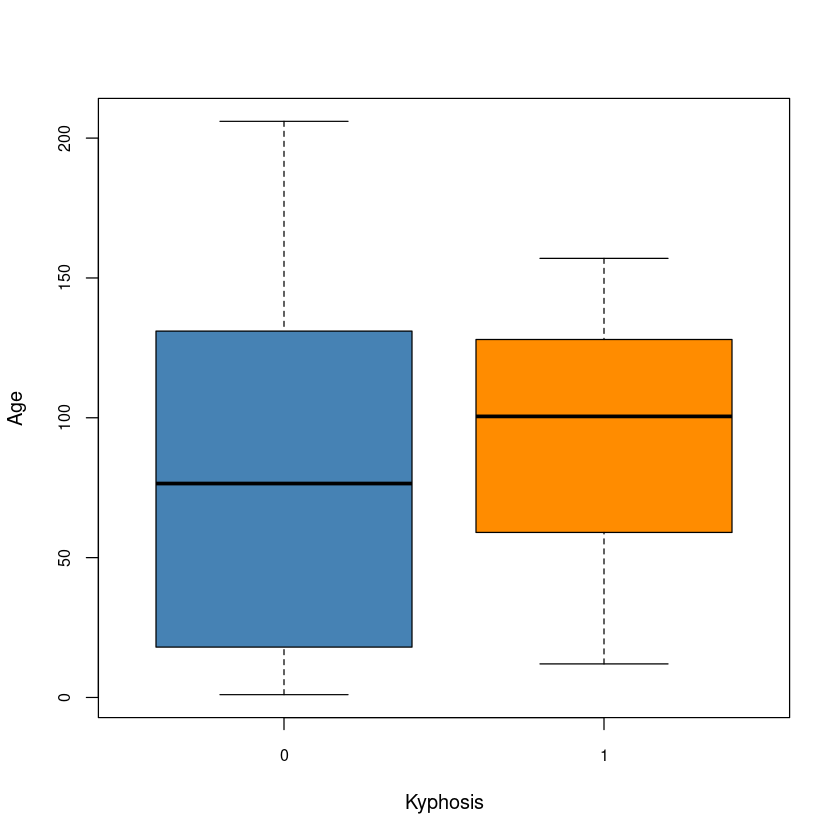

In [24]:
boxplot(age ~ kyphosis, data = dt, cex.axis = 0.8,
        xlab = "Kyphosis", ylab = "Age", col = c("steelblue", "darkorange"))

## (4)

로지스틱 회귀모형

$$logit(Pr(x))= log \dfrac{Pr(y = 1|x)}{1 − Pr(y = 1|x)}= α + β_1x + β_2x^2$$

를 적합시킨 후에 나이의 제곱합에 대한 유의성검정을 하여라

In [25]:
model2 <- glm(kyphosis ~ age + I(age^2), data = dt, family = binomial())
summary(model2)

$\widehat {kyphosis} = -2.0462547 + 0.0600398 \widehat{age} - 0.0003279\widehat{age}^2$

## (5)

$\hat β_2$의 의미를 서술하시오.

x가 한단위 증가하면 성공의 오즈는 e^(beta2)배 만큼 증가한다.

# 3번

살인사건에 대한 사형선고 여부와 인종사이의 관계를 알아보기 위하여 미국의
한 주의 2000년 이후의 해당 케이스들에 대하여, $y =$살인사건으로 기소된
사람에 대한 사형선고 여부(1=예, 0=아니오)를 반응변수로 하고 피고인(D)과
피해자(V)의 인종(1=흑인, 0=백인)를 설명변수로 하는 로지스틱 회귀모형을
적합하였다.적합에 의하여 추정된 추정식이

$$logit(\hat{Pr}(x))= log \dfrac{\hat{Pr}(y = 1|x)}{1 − \hat{Pr}(y = 1|x)}= −2.06 + 0.87D − 2.4V$$

라 한다. 다음은 예측식에 기초한 참과 거짓에 대한 질문이다. 참인지
거짓인지 판단하라. (풀이과정 기재

## (1)

사형선고에 대한 추정확률은 피고인이 백인(D=0)이고 피해자가 흑인(V=1)일
때 가장 낮다.

In [26]:
T

logit(Pr(y = 1\|x)) = -2.06 + 0.87D - 2.4V 에서

D=0, V=1대입하면

logit(Pr(y = 1\|x)) = -2.06 + 0.87(0) - 2.4(1) = -2.06 - 2.4 = -4.46

각 식에 e를 곱해주면

Pr(y = 1\|x) = exp(-4.46) / (1 + exp(-4.46))이다.

피고인이 백인이고 피해자가 흑인일때 사형이 선고될 예상 확률이다.

D=0, V=0 넣으면 -2.06

D=1, V=0 넣으면 -1.19

D=1, V=1 넣으면 -3.59

## (2)다시

피해자의 인종이 주어져 있을 떄 백인 피고인(D=0)이 사형선고를 받을 오즈의
추정값은 흑인 피고인(D=1)의 오즈의 0.87배이다.

만약 백인 피고인일 경우 D = 1이고 흑인일 경우 D = 0이면 D의 회귀계수의
추정값은 0.87이 아니라 1/0.87 = 1.15가 되었을 것이다.

In [ ]:
D의 회귀계수 추정값: 0.87

백인 피고인의 오즈가 흑인 피고인의 오즈의 0.87배

## (3) f

절편의 추정값 −2.06은 피고인과 피해자가 백인일 경우(D = V = 0)에
사형선고에 대한 추정확률이다.

D=0,V=0일때의 값이므로 trUE

## (4)

만약, 백인피해자와 피고인이 500명일 때, 사형선고를 받는 사람에 대해
모형에서 적합된 도수(즉, 추정되는 기대도수)는
$500e^{−2.06}/(1 + e^{−2.06})$과 같다.

In [ ]:
v=0, D=0이므로 대입해보면, 

로짓값
$logit(\hat pr(X)=-2.06+0.87 \times 0 - 2.4 \times 0$
       
확률

       $\hat pr(y=1|X)=e^{-2.06}

로짓 l 확률 p라고 놓으면

$L=ln\dfrac{p}{1-p}$

역함수 $p=\dfrac{1}{1+e^{-L}}$

아래위로 $e^{-L}$을 곱해주면 시그모이드 함수가 나옴

$p=\dfrac{e^{-L}}{e^{-L}+1}$

기대도수는 여기에다가 인원수 곱하면 됨.

# 4번

선형회귀모형

$$y_i = β_0 + β_1x_i + ϵ_i, i = 1, 2, · · · , n$$

에서 만약 오차벡터 $ϵ^⊤ = (ϵ_1, ϵ_2, · · · , ϵ_n)$의 분산-공분산행렬이

$$Var(\epsilon) = \begin{bmatrix}
\sigma_1^2 & 0 & \dots & 0 \\
0 & \sigma_2^2 & \dots & 0 \\
\dots & \dots &  & \dots \\
0 & 0 & \dots & \sigma_n^2
\end{bmatrix}$$

인 경우 $β_0$ 와 $β_1$의 GLS 추정값을 구하시오. 만약 회귀모형이

$$y_i = β_1x_i + ϵ_i$$

이면 $β_1$의 GLS 추정값은 어떻게 되는가?

GLS: $\hat \beta^*=(X^TV^{-1}X)^{-1}X^TV^{-1}Xy$

$E(\hat \beta^*)=(X^TV^{-1}X)^{-1}X^TV^{-1}X \beta=\beta$

$Var(\hat \beta^*)=(X^TV^{-1}X)^{-1}V^{-1}V \sigma^2 V^{-1}X(X^TV^{-1}X)^{-1}=\sigma^2(X^TV^{-1}X)^{-1}$

$SSE(\hat \beta^*)=(y-X\hat \beta^*)^T V^{-1}(y-X\hat \beta^*)$

$y=X \beta + \epsilon$

$Var(\epsilon) = \sigma^2 V$

$V=KK (K:n \times n)$

$K^{-1}y = K^{-1}X \beta + K^{-1} \epsilon$

$Var(K^{-1}\epsilon)=K^{-1}V \sigma^2 K^{-1} = K^{-1}KKK^{-1} \sigma^2 = I_n \sigma^2$

변수변환!

$y^* = X^*\beta + \epsilon^*$

$y^* = K^{-1}y, X^*=K^{-1}X, \epsilon^* = K^{-1}\epsilon$

$\widehat \beta = (X^{*T}X^*)^{-1}X^{*T}y^*=(X^TK^{-1}K^{-1}X)^{-1}X^TK^{-1}K^{-1}y$

$KK=V, K^{-1}K^{-1}=V^{-1}$

$\widehat \beta^{GLS}=(X^TV^{-1}X)^{-1}X^TV^{-1}y$